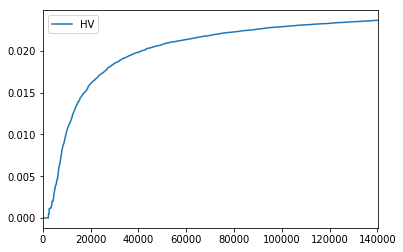

In [24]:
import pandas as pd

pd.read_csv('../output/hvimprovement.21', names=["HV"]).plot()

